In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [1]:
pip install scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv("Stroke prediction_ANN.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
df['bmi'].mean()

28.893236911794666

In [19]:
df['bmi'].median()

28.1

In [21]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Imputation

In [23]:
df.loc[df['bmi'].isnull(),'bmi']=201

In [25]:
df.bmi.isnull().sum()

0

In [27]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [29]:

col=['gender','ever_married','work_type','Residence_type','smoking_status']
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col:
    df[i] = labelencoder.fit_transform(df[i])

In [31]:
print(df[i])

0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int32


In [33]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,201.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,201.0,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


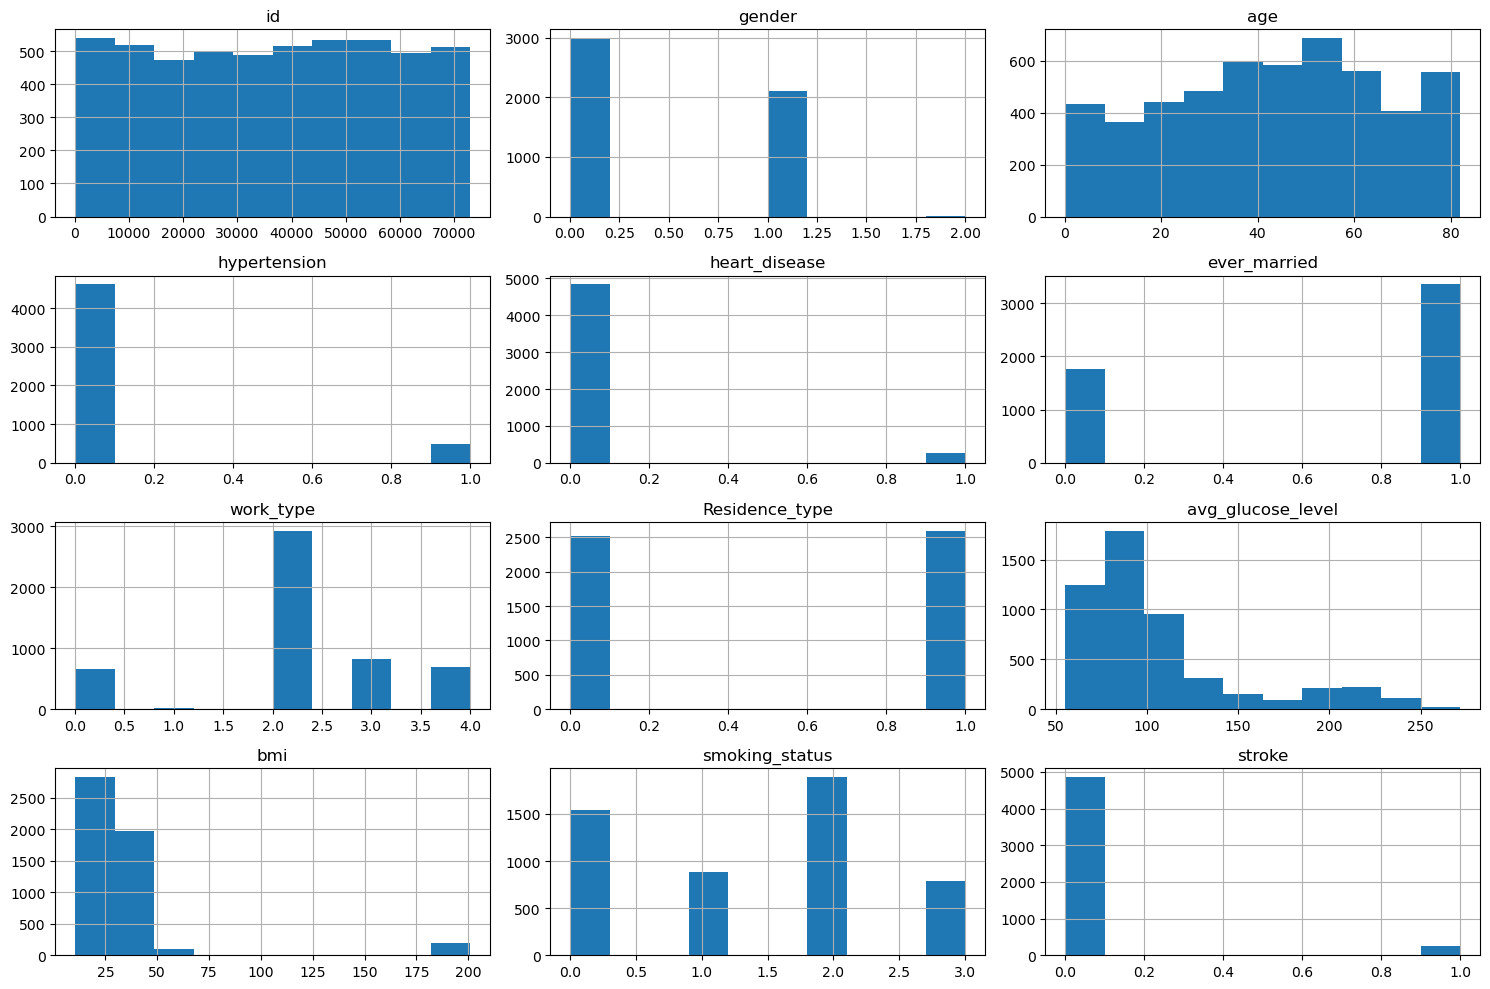

In [234]:
#Histogram for Numeric Columns
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

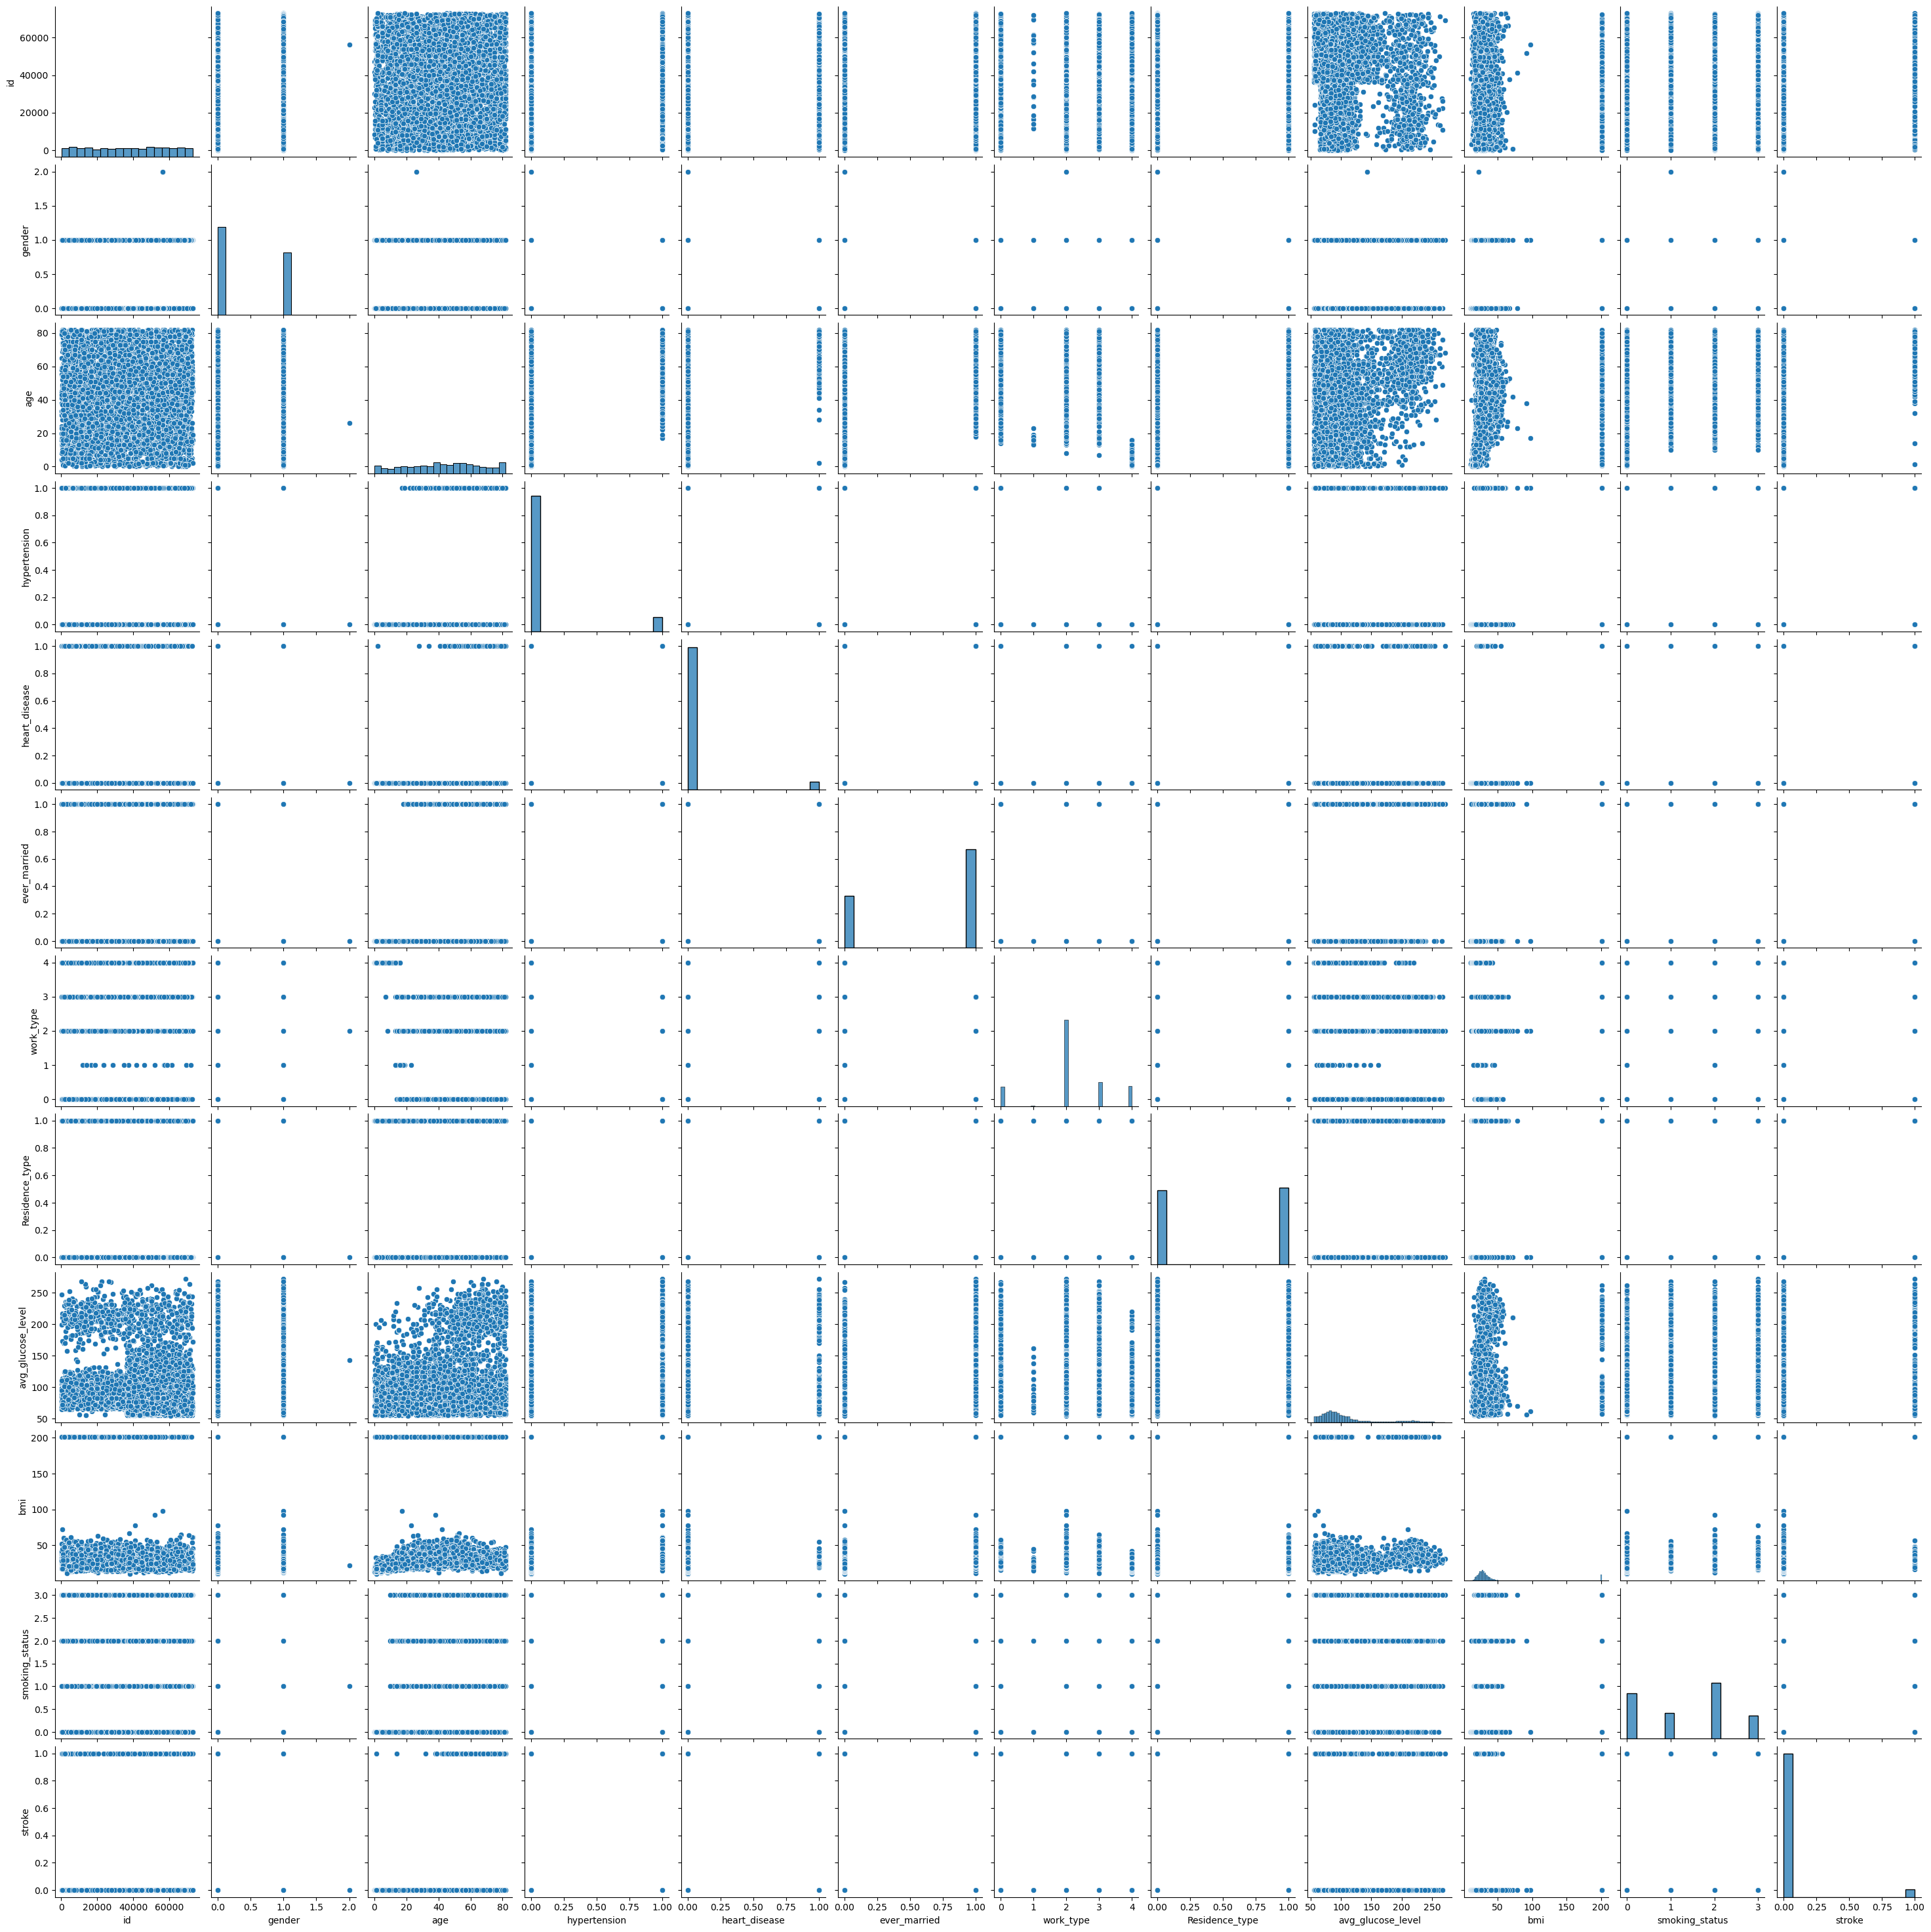

In [35]:
sns.pairplot(data=df)

<Axes: xlabel='gender', ylabel='ever_married'>

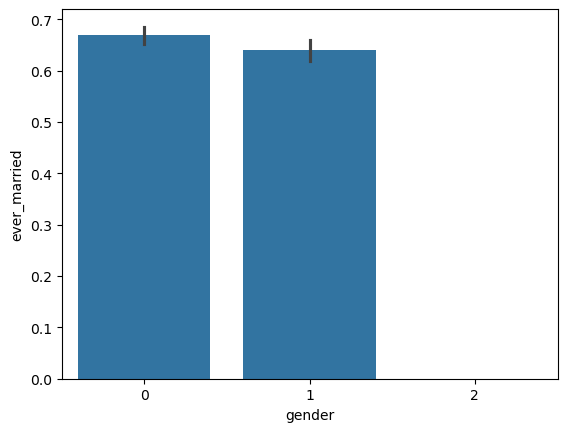

In [36]:
sns.barplot(x='gender',y='ever_married',data=df)

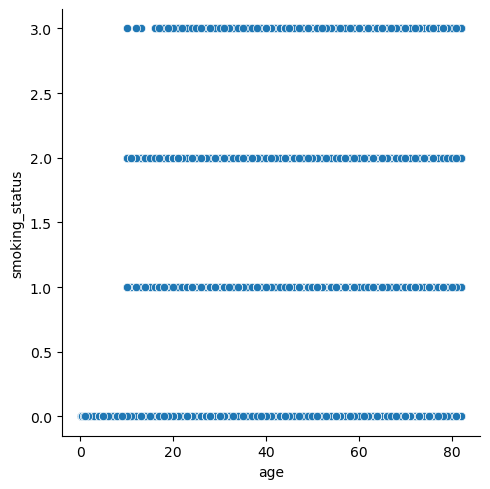

In [41]:
sns.relplot(x='age',y='smoking_status',data=df)

In [43]:
df.age.isnull().sum()

0

In [45]:
# Value count in the stroke attribute
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

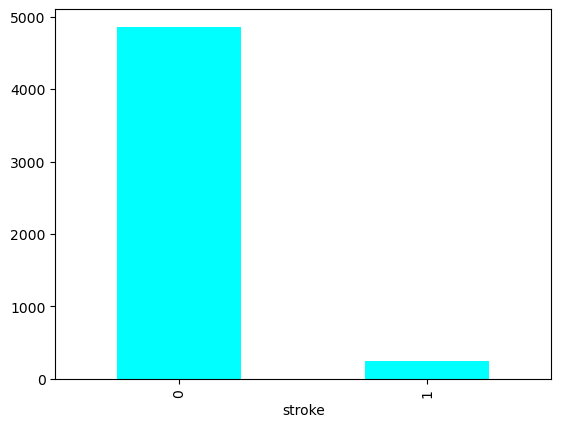

In [47]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

<Axes: ylabel='count'>

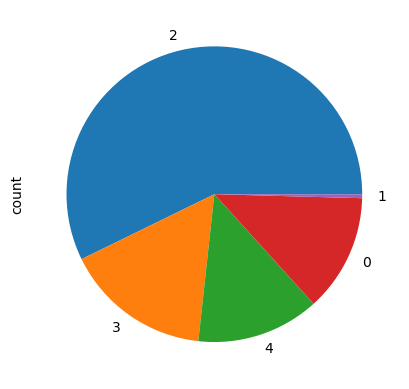

In [49]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

In [51]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64

<Axes: ylabel='count'>

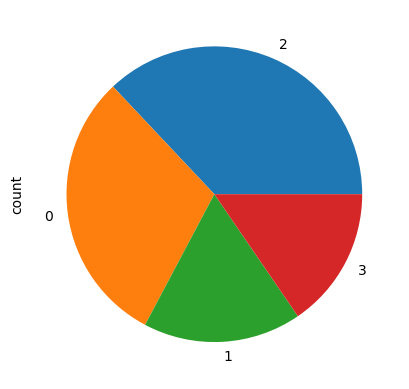

In [53]:
df['smoking_status'].value_counts().plot(kind='pie')

In [55]:
df['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

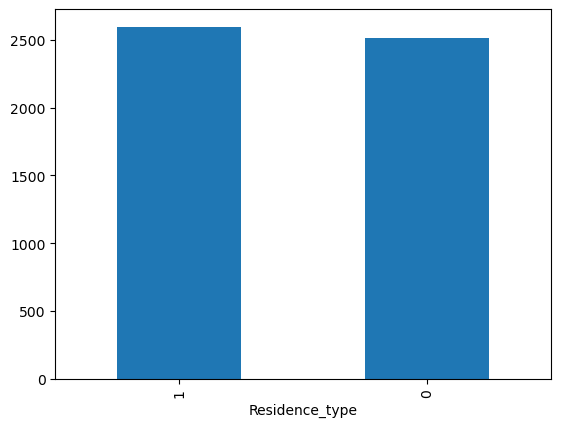

In [57]:
df['Residence_type'].value_counts().plot(kind="bar")

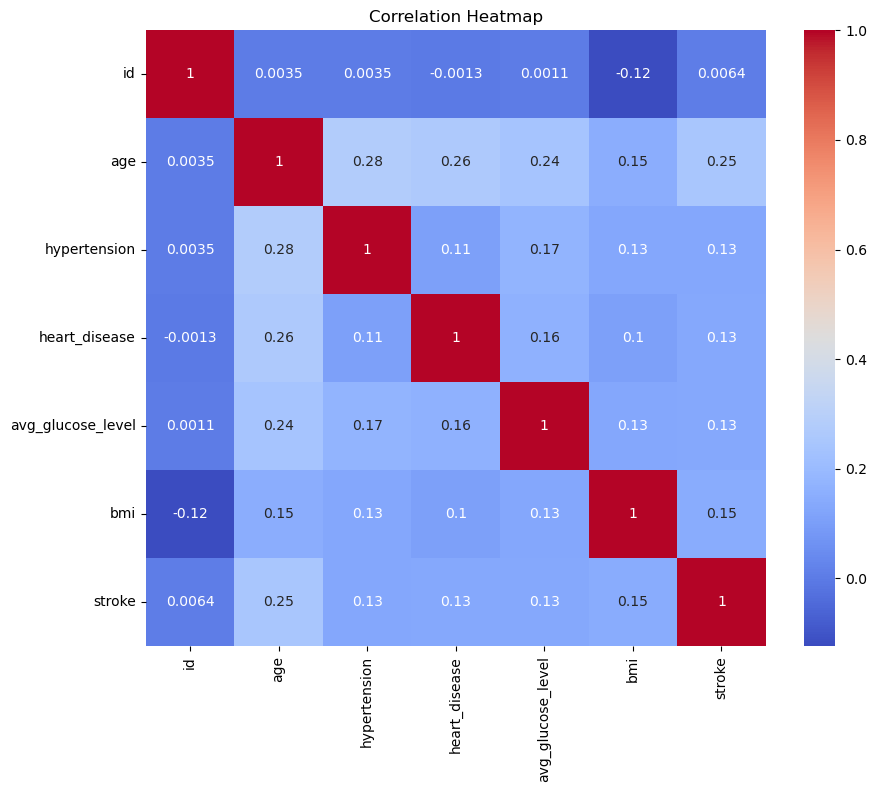

In [256]:
#Correlation Heatmap for Numeric Columns
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 11)
(1022, 11)
(4088,)
(1022,)


In [103]:
X_train=X_train.values.reshape(4088,11)
X_test=X_test.values.reshape(1022,11)
y_train=y_train.values.reshape(4088,)
y_test=y_test.values.reshape(1022,)

In [67]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [105]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1
1,51676,0,61.0,0,0,1,3,0,202.21,201.0,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,201.0,2
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1


In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [133]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2889,17236,0,3.0,0,0,0,4,1,66.61,17.4,0
1902,67942,1,21.0,0,0,0,2,0,65.09,23.5,2
2352,58599,0,67.0,0,0,1,2,0,62.66,28.0,1
1604,25107,0,47.0,0,0,1,2,1,65.04,30.9,2
1837,5478,0,60.0,0,0,1,3,1,203.04,201.0,3
...,...,...,...,...,...,...,...,...,...,...,...
3671,37038,1,15.0,0,0,0,4,1,95.86,18.1,0
709,49086,0,23.0,0,0,0,2,1,60.50,27.1,1
2487,44325,1,78.0,0,0,1,3,0,126.39,21.3,3
174,40899,0,78.0,0,0,1,3,0,60.67,201.0,1


In [137]:
y_train

2889    0
1902    0
2352    0
1604    0
1837    0
       ..
3671    0
709     0
2487    0
174     1
1146    0
Name: stroke, Length: 4088, dtype: int64

In [139]:
X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
573,58007,0,36.0,0,0,1,2,1,87.88,34.7,3
3672,4528,1,45.0,1,0,0,2,0,85.52,36.4,2
997,61715,1,55.0,0,0,1,2,0,56.42,31.8,2
4957,875,0,34.0,0,0,0,2,1,67.66,22.4,2
4544,54869,0,30.0,0,0,1,2,1,116.98,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...
2595,12228,1,13.0,0,0,0,4,0,97.97,24.5,2
4707,51486,0,61.0,0,0,1,2,0,106.65,35.9,1
1725,24782,1,36.0,0,0,1,2,0,83.79,25.5,3
4745,55140,1,69.0,1,0,0,2,1,75.95,28.6,2


In [81]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [83]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=32, epochs=25)

Epoch 1/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6620 - loss: 1024.8179 - val_accuracy: 0.2603 - val_loss: 18.2421
Epoch 2/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 15.0072 - val_accuracy: 0.9501 - val_loss: 14.4924
Epoch 3/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 12.3876 - val_accuracy: 0.9501 - val_loss: 5.7986
Epoch 4/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 15.0205 - val_accuracy: 0.9511 - val_loss: 29.6979
Epoch 5/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9166 - loss: 19.4951 - val_accuracy: 0.9511 - val_loss: 35.0012
Epoch 6/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9132 - loss: 18.2596 - val_accuracy: 0.9511 - val_loss: 25.9416
Epoch 7/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8937 - loss: 17.7277 - val_accuracy: 0.9061 - val_loss: 3.1860
Epoch 8/25
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 14.8390 - v

In [87]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,789 (10.90 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,860 (7.27 KB)

In [89]:
pred=model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [91]:
pred[1]

array([0.99999905], dtype=float32)

In [93]:
pred.shape

(1022, 1)

In [95]:
pred_class=np.argmax(pred,axis=1)

In [99]:
pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
max(pred[1])

0.99999905

In [109]:
np.argmax(pred[1])

0

In [111]:
pred.shape

(1022, 1)

In [119]:
from sklearn.metrics import *

In [121]:
cm=confusion_matrix(y_test,pred_class)
cm

array([[972,   0],
       [ 50,   0]], dtype=int64)

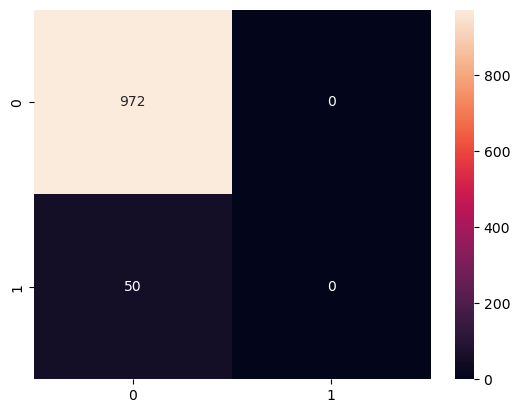

In [123]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [125]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\RAVALI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAVALI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAVALI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
from sklearn.neural_network import MLPClassifier
# Initialize the MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(32,),  # Single hidden layer with 64 neurons
                    activation='relu',         # ReLU activation function
                    solver='adam',             # Optimization algorithm
                    max_iter=200,              # Maximum number of iterations
                    random_state=42)

# Train the model
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(32,), random_state=42)

In [143]:
from sklearn.metrics import *
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9471624266144814

In [145]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9472
